In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [10]:
dataframe = pd.read_excel('StartUpsESG_0602.xlsx')
dataframe

,id,StartUp,Country,Year,ESG,E,S,G,Raised,distr_tk,...,FISCALFRD,FINACIFRD,FOREIGINVEST,FOREIGDP,INTERPAY,percmath,GINI,MAKTEFF,PERCTECH,DEVCOUNT
0,12316,VenusEnergy,Lithuania,2018,0.010,0.008,0.002,0.000,5986183.0,0.27,...,96.7,70,1.299842e+09,2.420713,3.476571,4.26941,35.7,4.642995,3.11263,1
1,23416,GreenEnergyCoin,Netherlands,2018,0.018,0.010,0.006,0.002,0.0,0.00,...,88.2,80,-3.614670e+11,-39.565294,2.264509,6.37706,28.1,5.408080,2.82506,1
2,1553,HydroMiner,Austria,2017,0.014,0.010,0.000,0.004,3500000.0,0.00,...,81.1,70,-2.855524e+10,-6.277635,3.644302,6.07867,30.8,4.897589,4.38647,1
3,17028,PowerCorp,"Hong Kong SAR, China",2018,0.008,0.006,0.000,0.002,0.0,0.00,...,100.0,90,9.703626e+10,26.828457,0.050000,0.00000,0.0,5.705542,0.00000,1
4,8483,Emyron Coin,United States,2018,0.017,0.000,0.011,0.006,0.0,0.28,...,54.8,80,2.614820e+11,1.268600,11.816379,7.20920,41.4,5.209139,3.78213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,6422,SUPP Network,United States,0,0.000,0.000,0.000,0.000,0.0,0.30,...,54.8,80,2.614820e+11,1.268600,11.816379,7.20920,41.4,5.209139,3.78213,1
6537,6423,Thousand Token,Colombia,0,0.000,0.000,0.000,0.000,0.0,0.10,...,82.2,70,1.153511e+10,3.451576,9.907686,1.38160,50.4,4.063790,4.82347,0
6538,6424,Cryptocurrency Market,Spain,0,0.000,0.000,0.000,0.000,0.0,0.70,...,36.1,70,5.538257e+10,3.896177,6.713329,5.19562,34.7,4.451561,3.92247,0
6539,6425,IQ Token,Belarus,0,0.000,0.000,0.000,0.000,0.0,0.00,...,75.4,10,1.426500e+09,2.376262,6.228334,2.84452,25.2,0.000000,4.51118,0


In [11]:
hasNull = dataframe.isnull().sum()
hasNull

id                     0
StartUp                0
Country                0
Year                   0
ESG                    0
E                      0
S                      0
G                      0
Raised                 0
distr_tk               0
Rating                 0
 platform ETHEREUM     0
 kyc                   0
 whitelist             0
 mvp                   0
 teamsize              0
 duracao               0
 retrictions USD       0
 FIAT                  0
 EPI                   0
 GOVEF                 0
 POLEST                0
 REGQ                  0
 EDBUS                 0
 PUBEXP                0
 TERT                  0
 TEACHT                0
 DOCT                  0
 RDEXP                 0
 HTECEXP               0
 QINSTIT               0
 SJOUR                 0
 DCRED                 0
 STOCMARK              0
 DMED                  0
 DMEDIA                0
 GDPC                  0
 CREDINAD              0
 CONCTBANK             0
 EASYL                 0


In [12]:
Countries = dataframe['Country'].unique()

Categorias do BNDES para classificao das startups por financiamento

In [13]:
category_raised = []
for raised in dataframe['Raised']:
  if raised <= 360000:
    category_raised.append(0)
  elif raised > 360000 and raised <= 4800000:
    category_raised.append(1)
  elif raised > 4800000 and raised <= 300000000:
    category_raised.append(2)
  else:
    category_raised.append(3)

In [14]:
df = dataframe[['Country','ESG','E','S','G','Raised']]
df

,Country,ESG,E,S,G,Raised
0,Lithuania,0.010,0.008,0.002,0.000,5986183.0
1,Netherlands,0.018,0.010,0.006,0.002,0.0
2,Austria,0.014,0.010,0.000,0.004,3500000.0
3,"Hong Kong SAR, China",0.008,0.006,0.000,0.002,0.0
4,United States,0.017,0.000,0.011,0.006,0.0
...,...,...,...,...,...,...
6536,United States,0.000,0.000,0.000,0.000,0.0
6537,Colombia,0.000,0.000,0.000,0.000,0.0
6538,Spain,0.000,0.000,0.000,0.000,0.0
6539,Belarus,0.000,0.000,0.000,0.000,0.0


In [15]:
teste = df[df['Raised']!=0]
teste

,Country,ESG,E,S,G,Raised
0,Lithuania,0.010,0.008,0.002,0.000,5986183.0
2,Austria,0.014,0.010,0.000,0.004,3500000.0
5,British Virgin Islands,0.011,0.000,0.011,0.000,36416517.0
7,Russian Federation,0.006,0.000,0.004,0.002,9815000.0
8,Russian Federation,0.014,0.010,0.002,0.002,175492.0
...,...,...,...,...,...,...
6487,Singapore,0.000,0.000,0.000,0.000,10000000.0
6501,Malta,0.000,0.000,0.000,0.000,66000000.0
6520,United States,0.000,0.000,0.000,0.000,1020000.0
6524,Turkey,0.000,0.000,0.000,0.000,56000.0


In [16]:
Countries

array(['Lithuania', 'Netherlands', 'Austria', 'Hong Kong SAR, China',
       'United States', 'British Virgin Islands', 'Singapore',
       'Russian Federation', 'Philippines', 'United Kingdom', 'Estonia',
       'China', 'Switzerland', 'Belgium', 'Cayman Islands', 'Latvia',
       'Portugal', 'Bosnia and Herzegovina', 'Luxembourg', 'Poland',
       'Canada', 'Australia', 'Hungary', 'Germany', 'Finland', 'Georgia',
       'Bulgaria', 'Italy', 'Norway', 'Romania', 'Malta', 'Ukraine',
       'Cyprus', 'Spain', 'Turkey', 'Afghanistan', 'Indonesia',
       'Gibraltar', 'Tanzania', 'France', 'Thailand', 'Israel', 'India',
       'Jamaica', 'Samoa', 'Panama', 'Brazil', 'Czech Republic',
       'Venezuela, RB', 'Costa Rica', 'Seychelles', 'Slovenia',
       'Korea, Rep.', 'Belize', 'Argentina', 'Sweden',
       'United Arab Emirates', 'South Africa', 'Japan', 'Chile',
       'Croatia', 'Mauritius', 'Ireland', 'Mexico', 'Kazakhstan',
       'Nigeria', 'Taiwan', 'Belarus', 'Dominican Republic',

In [17]:
Paises_desenvolvidos = ["Austria","Australia","Belgium","Canada","Cyprus","Denmark","Estonia","Finland","France","Germany","Greece","Iceland","Ireland","Israel","Italy","Japan","Latvia","Lithuania","Luxembourg","Malta","Netherlands","New Zealand","Norway","Portugal","Singapore","Slovenia","South Korea","Spain","Sweden","Switzerland","United Kingdom","United States"]
Paises_em_desevolvimento = ["Argentina","Brazil","Bulgaria","Chile","China","Croatia","Czech Republic","Hungary","India","Indonesia","Malaysia","Mexico","Poland","Romania","Russian Federation","Slovakia","South Africa","Taiwan","Thailand","Turkey","United Arab Emirates"]
Paises_subdesenvolvidos = ["Afghanistan","Albania","Armenia","Azerbaijan","Bahamas, The","Bangladesh","Belize","Bosnia and Herzegovina","Botswana","British Virgin Islands","Cambodia","Cameroon","Cayman Islands","Colombia","Costa Rica","Dominican Republic","Ecuador","Egypt, Arab Rep.","Georgia","Ghana","Gibraltar","Guinea-Bissau","Hong Kong SAR, China","Jamaica","Kazakhstan","Kenya","Lao PDR","Macedonia","Marshall Islands","Mauritius","Moldova","Mongolia","Montenegro","Morocco","Nigeria","Oman","Panama","Paraguay","Peru","Philippines","Samoa","Saudi Arabia","Serbia","Seychelles","Sierra Leone","Sri Lanka","St. Kitts and Nevis","St. Lucia","St. Vincent and the Grenadines","Swaziland","Syrian Arab Republic","Tanzania","Timor-Leste","Tunisia","Ukraine","Venezuela, RB","Vietnam","Zimbabwe"]

In [18]:
category_country  = []
for Country in df['Country']:
  if Country in Paises_desenvolvidos:
    category_country .append(0)
  elif Country in Paises_em_desevolvimento:
    category_country .append(1)
  else:
    category_country .append(2)

In [19]:
df["Country_id"] = category_country
df

<ipython-input-19-65e724e47892>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,ESG,E,S,G,Raised,Country_id
0,Lithuania,0.010,0.008,0.002,0.000,5986183.0,0
1,Netherlands,0.018,0.010,0.006,0.002,0.0,0
2,Austria,0.014,0.010,0.000,0.004,3500000.0,0
3,"Hong Kong SAR, China",0.008,0.006,0.000,0.002,0.0,2
4,United States,0.017,0.000,0.011,0.006,0.0,0
...,...,...,...,...,...,...,...
6536,United States,0.000,0.000,0.000,0.000,0.0,0
6537,Colombia,0.000,0.000,0.000,0.000,0.0,2
6538,Spain,0.000,0.000,0.000,0.000,0.0,0
6539,Belarus,0.000,0.000,0.000,0.000,0.0,2


In [20]:
df['Raised_id'] = category_raised
df

<ipython-input-20-68aa33afaefb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,ESG,E,S,G,Raised,Country_id,Raised_id
0,Lithuania,0.010,0.008,0.002,0.000,5986183.0,0,2
1,Netherlands,0.018,0.010,0.006,0.002,0.0,0,0
2,Austria,0.014,0.010,0.000,0.004,3500000.0,0,1
3,"Hong Kong SAR, China",0.008,0.006,0.000,0.002,0.0,2,0
4,United States,0.017,0.000,0.011,0.006,0.0,0,0
...,...,...,...,...,...,...,...,...
6536,United States,0.000,0.000,0.000,0.000,0.0,0,0
6537,Colombia,0.000,0.000,0.000,0.000,0.0,2,0
6538,Spain,0.000,0.000,0.000,0.000,0.0,0,0
6539,Belarus,0.000,0.000,0.000,0.000,0.0,2,0


In [21]:
# teste = df[df['Raised_id'] == 3]
# teste

In [22]:
numer = df[['ESG','E','S','G','Raised']]
numer

,ESG,E,S,G,Raised
0,0.010,0.008,0.002,0.000,5986183.0
1,0.018,0.010,0.006,0.002,0.0
2,0.014,0.010,0.000,0.004,3500000.0
3,0.008,0.006,0.000,0.002,0.0
4,0.017,0.000,0.011,0.006,0.0
...,...,...,...,...,...
6536,0.000,0.000,0.000,0.000,0.0
6537,0.000,0.000,0.000,0.000,0.0
6538,0.000,0.000,0.000,0.000,0.0
6539,0.000,0.000,0.000,0.000,0.0


In [23]:
cater = df[['Country_id','Raised_id']]
cater

,Country_id,Raised_id
0,0,2
1,0,0
2,0,1
3,2,0
4,0,0
...,...,...
6536,0,0
6537,2,0
6538,0,0
6539,2,0


In [24]:
scaler = StandardScaler()

In [25]:
numer = pd.DataFrame(scaler.fit_transform(numer))
numer.columns = ['ESG','E','S','G','Raised']
numer

,ESG,E,S,G,Raised
0,3.092590,4.880242,0.769739,-0.229437,0.086857
1,5.809621,6.126549,2.782878,1.249132,-0.187503
2,4.451105,6.126549,-0.236831,2.727700,-0.027090
3,2.413333,3.633935,-0.236831,1.249132,-0.187503
4,5.469992,-0.104986,5.299302,4.206269,-0.187503
...,...,...,...,...,...
6536,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503
6537,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503
6538,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503
6539,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503


In [26]:
X = pd.concat([numer, cater], axis=1, join='inner')
X

,ESG,E,S,G,Raised,Country_id,Raised_id
0,3.092590,4.880242,0.769739,-0.229437,0.086857,0,2
1,5.809621,6.126549,2.782878,1.249132,-0.187503,0,0
2,4.451105,6.126549,-0.236831,2.727700,-0.027090,0,1
3,2.413333,3.633935,-0.236831,1.249132,-0.187503,2,0
4,5.469992,-0.104986,5.299302,4.206269,-0.187503,0,0
...,...,...,...,...,...,...,...
6536,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503,0,0
6537,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503,2,0
6538,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503,0,0
6539,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503,2,0


In [67]:
X_kmeans = X.copy()
X_tsne = X.copy()

In [28]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=36dd1b2d07129987dffd4f70d5049f4765db0baab0703b7ba16bdd0299a605b6
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [29]:
from minisom import MiniSom

In [30]:
Raised_minisom = X[['Raised','ESG']]
Raised_minisom

,Raised,ESG
0,0.086857,3.092590
1,-0.187503,5.809621
2,-0.027090,4.451105
3,-0.187503,2.413333
4,-0.187503,5.469992
...,...,...
6536,-0.187503,-0.303698
6537,-0.187503,-0.303698
6538,-0.187503,-0.303698
6539,-0.187503,-0.303698


In [31]:
data = Raised_minisom.values

In [32]:
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.7754773759696965


In [33]:
# cada neuronio representa um cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# com np.ravel_multi_index convertemos o bidimensional
# coordenadas para um índice monodimensional
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

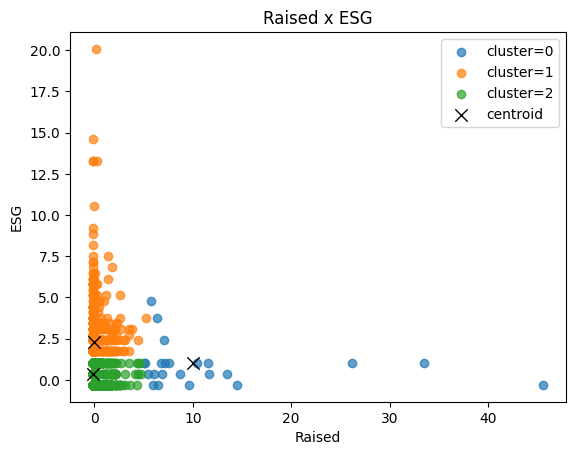

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotando os clusters usando as 2 primeiras dimensões dos dados
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotando centroides
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=80, linewidths=1, color='k', label='centroid')

plt.title("Raised x ESG")
plt.xlabel("Raised")
plt.ylabel("ESG")
plt.legend();

In [35]:
Country_minisom = X[['Country_id','ESG']]
Country_minisom

,Country_id,ESG
0,0,3.092590
1,0,5.809621
2,0,4.451105
3,2,2.413333
4,0,5.469992
...,...,...
6536,0,-0.303698
6537,2,-0.303698
6538,0,-0.303698
6539,2,-0.303698


In [36]:
data = Country_minisom.values

In [37]:
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.8526484723622741


In [38]:
# cada neuronio representa um cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# com np.ravel_multi_index convertemos o bidimensional
# coordenadas para um índice monodimensional
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

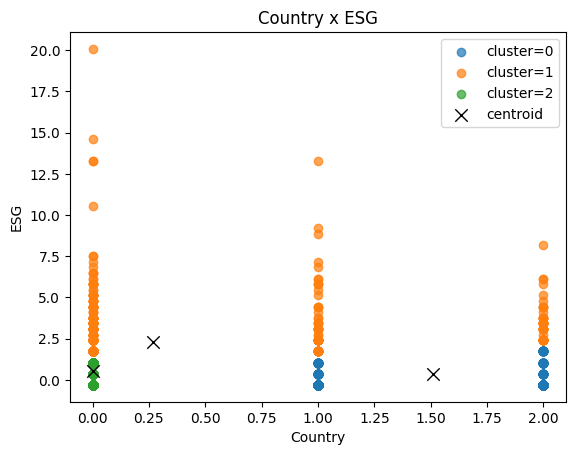

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotando os clusters usando as 2 primeiras dimensões dos dados
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotando centroides
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=80, linewidths=1, color='k', label='centroid')

plt.title("Country x ESG")
plt.xlabel("Country")
plt.ylabel("ESG")
plt.legend();

In [40]:
Country_Raised_minisom = X[['Country_id','Raised']]
Country_Raised_minisom

,Country_id,Raised
0,0,0.086857
1,0,-0.187503
2,0,-0.027090
3,2,-0.187503
4,0,-0.187503
...,...,...
6536,0,-0.187503
6537,2,-0.187503
6538,0,-0.187503
6539,2,-0.187503


In [41]:
data = Country_Raised_minisom.values

In [42]:
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.3688198359102922


In [43]:
# cada neuronio representa um cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# com np.ravel_multi_index convertemos o bidimensional
# coordenadas para um índice monodimensional
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

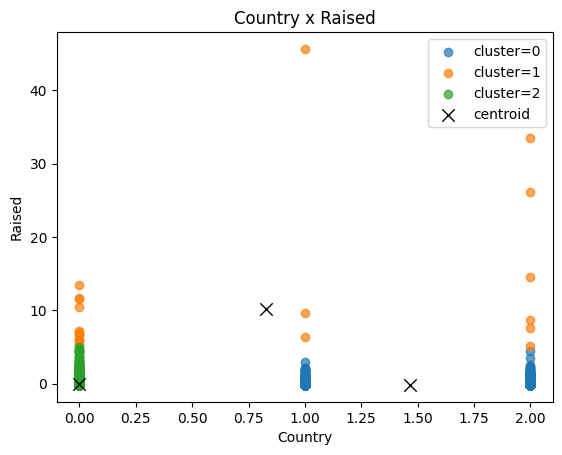

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotando os clusters usando as 2 primeiras dimensões dos dados
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotando centroides
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
                s=80, linewidths=1, color='k', label='centroid')

plt.title("Country x Raised")
plt.xlabel("Country")
plt.ylabel("Raised")
plt.legend();

In [45]:
kmeans = KMeans(n_clusters=3)

In [46]:
kmeans.fit(X_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [47]:
clusters = kmeans.predict(X_kmeans)

In [71]:
X_kmeans["Cluster"] = clusters
X_tsne["Cluster"] = clusters

In [49]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(X_kmeans.sample(5000)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X_kmeans.columns

In [50]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [51]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [52]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [53]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [54]:
plotX["dummy"] = 0

In [55]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [56]:
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "colab"

In [57]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'

trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [58]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [59]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [60]:
with pd.ExcelWriter('output/Startups_cluster0.xlsx') as excel_writer:
    cluster0.to_excel(excel_writer, sheet_name='Sheet1', index=False)
with pd.ExcelWriter('output/Startups_cluster1.xlsx') as excel_writer:
    cluster1.to_excel(excel_writer, sheet_name='Sheet1', index=False)
with pd.ExcelWriter('output/Startups_cluster2.xlsx') as excel_writer:
    cluster2.to_excel(excel_writer, sheet_name='Sheet1', index=False)

OSError: Cannot save file into a non-existent directory: 'output'

In [109]:
## Metodo 2: T-SNE

#plotX will hold the values we wish to plot
plotX = pd.DataFrame(np.array(X_tsne.sample(5000)))
plotX.columns = X_tsne.columns

plotX

,ESG,E,S,G,Raised,Country_id,Raised_id,Cluster
0,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503,2.0,0.0,0.0
1,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503,0.0,0.0,0.0
2,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503,0.0,0.0,0.0
3,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503,0.0,0.0,0.0
4,-0.303698,-0.104986,-0.236831,-0.229437,-0.187503,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4995,2.413333,4.880242,-0.236831,-0.229437,-0.187503,2.0,0.0,2.0
4996,-0.303698,-0.104986,-0.236831,-0.229437,-0.067193,2.0,1.0,0.0
4997,1.734075,-0.104986,-0.236831,4.206269,-0.187503,0.0,0.0,2.0
4998,-0.303698,-0.104986,-0.236831,-0.229437,0.339568,1.0,2.0,0.0


In [110]:
#Set our perplexity
perplexity = 50

In [111]:
#T-SNE with one dimension
tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
tsne_3d = TSNE(n_components=3, perplexity=perplexity)

In [112]:
#This DataFrame holds a single dimension,built by T-SNE
TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three dimensions, built by T-SNE
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [113]:
TCs_1d.columns = ["TC1_1d"]
#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [114]:
plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')

In [115]:
plotX["dummy"] = 0

In [116]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [117]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [118]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [119]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["TC1_3d"],
                    y = cluster2["TC2_3d"],
                    z = cluster2["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)